# Player Detection Using YOLOv8

This notebook outlines the process of training a YOLOv8 model for the purpose of detecting players in sports videos or images. The goal is to achieve accurate player detection that can be utilized for various applications such as game analysis, player tracking, and automated highlight generation.

## Overview
- **Environment Setup**: Preparation of the necessary libraries and tools required for model training.
- **Data Preparation**: Loading and preprocessing of the dataset to make it suitable for training the YOLOv8 model.
- **Model Training**: Configuration and execution of the training process using the prepared dataset.
- **Evaluation and Results**: Analysis of the model's performance and visualization of detection results.

This documentation aims to make the notebook more user-friendly and understandable, guiding through each step of the process.


In [ ]:
# Display the status of NVIDIA GPU(s) in the environment
# This command is useful for checking the GPU allocation, driver version, and usage status.
# It helps in ensuring that the GPU is correctly recognized and available for model training.
!nvidia-smi

Sat Feb  3 01:50:24 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   46C    P8              10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

## Environment Setup

In this section, we prepare the environment for model training by installing the necessary libraries and packages. This includes setting up the deep learning framework, YOLOv8 dependencies, and any other utilities required for data handling and visualization. Ensuring that these components are correctly installed and configured is crucial for the smooth execution of subsequent steps.


In [ ]:
# Install the ultralytics library for YOLO model training and inference
# This library provides tools and utilities for training YOLO models on custom datasets
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 709.3/709.3 kB 8.5 MB/s eta 0:00:00


### Installing Necessary Libraries

Continuing with the environment setup, we install the `ultralytics` library, a comprehensive toolset for training and deploying YOLO models. This library simplifies the process of model training, evaluation, and inference.

The dataset can be found in the following Drive folder, and it is recommended to create a shortcut from your "MyDrive" folder in order to mantain the defined path.

In [ ]:
# Import necessary libraries from ultralytics for YOLO model operations
import ultralytics
from ultralytics import YOLO
import os
from IPython.display import display, Image
from IPython import display

# Clear any previous outputs to maintain a clean notebook presentation
display.clear_output()

# Perform initial checks to ensure the environment is correctly set up for YOLO operations
ultralytics.checks()

# Define the path to the dataset to be used for training
DATASET_PATH = "/content/drive/MyDrive/soccer-players-detection-yolov8"

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/166.8 GB disk)


## Data Preparation

Before proceeding to model training, it's essential to prepare the dataset. The dataset path is specified, pointing to the location where our training data is stored. This step ensures that the model has access to the correct dataset for training. The `ultralytics` checks are also performed to verify the environment's compatibility with the training process.

In [ ]:
# Initiate the training process for the YOLO model on the specified dataset
# Configuration:
# - Task: Detect
# - Mode: Train
# - Model: Pretrained model 'yolov8m.pt' as the starting point
# - Data: Path to the dataset configuration file
# - Epochs: Number of training epochs
# - Image size: The size of the images for training
# - Plots: Generate training plots for analysis
!yolo task=detect mode=train model=yolov8m.pt data={DATASET_PATH}/data.yaml epochs=50 imgsz=800 plots=True

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/soccer-players-detection-yolov8/data.yaml, epochs=50, time=None, patience=50, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, sh

## Model Training

The model training is initiated with specific configurations such as the model type, dataset, number of epochs, and image size. Using a pretrained model (`yolov8m.pt`) as a starting point accelerates the training process and improves the detection accuracy on our dataset. Training plots will be generated to visually analyze the model's performance over epochs.

In [ ]:
import os

# Get the current working directory to navigate through the file system
HOME = os.getcwd()
print(HOME)

# List the contents of the directory where training results are stored
# This helps in verifying the output files generated by the training process
!ls {HOME}/runs/detect/train2/

/content
args.yaml					    R_curve.png		 val_batch0_labels.jpg
confusion_matrix_normalized.png			    results.csv		 val_batch0_pred.jpg
confusion_matrix.png				    results.png		 val_batch1_labels.jpg
events.out.tfevents.1706925494.726f5b59dea2.2811.0  train_batch0.jpg	 val_batch1_pred.jpg
F1_curve.png					    train_batch1.jpg	 val_batch2_labels.jpg
labels_correlogram.jpg				    train_batch2.jpg	 val_batch2_pred.jpg
labels.jpg					    train_batch7040.jpg  weights
P_curve.png					    train_batch7041.jpg
PR_curve.png					    train_batch7042.jpg


## Reviewing Training Outputs

After training, it's important to review the outputs to ensure the training process completed successfully and generated the expected files. This includes checking for the presence of results such as confusion matrices, detection visualizations, and training plots.

/content


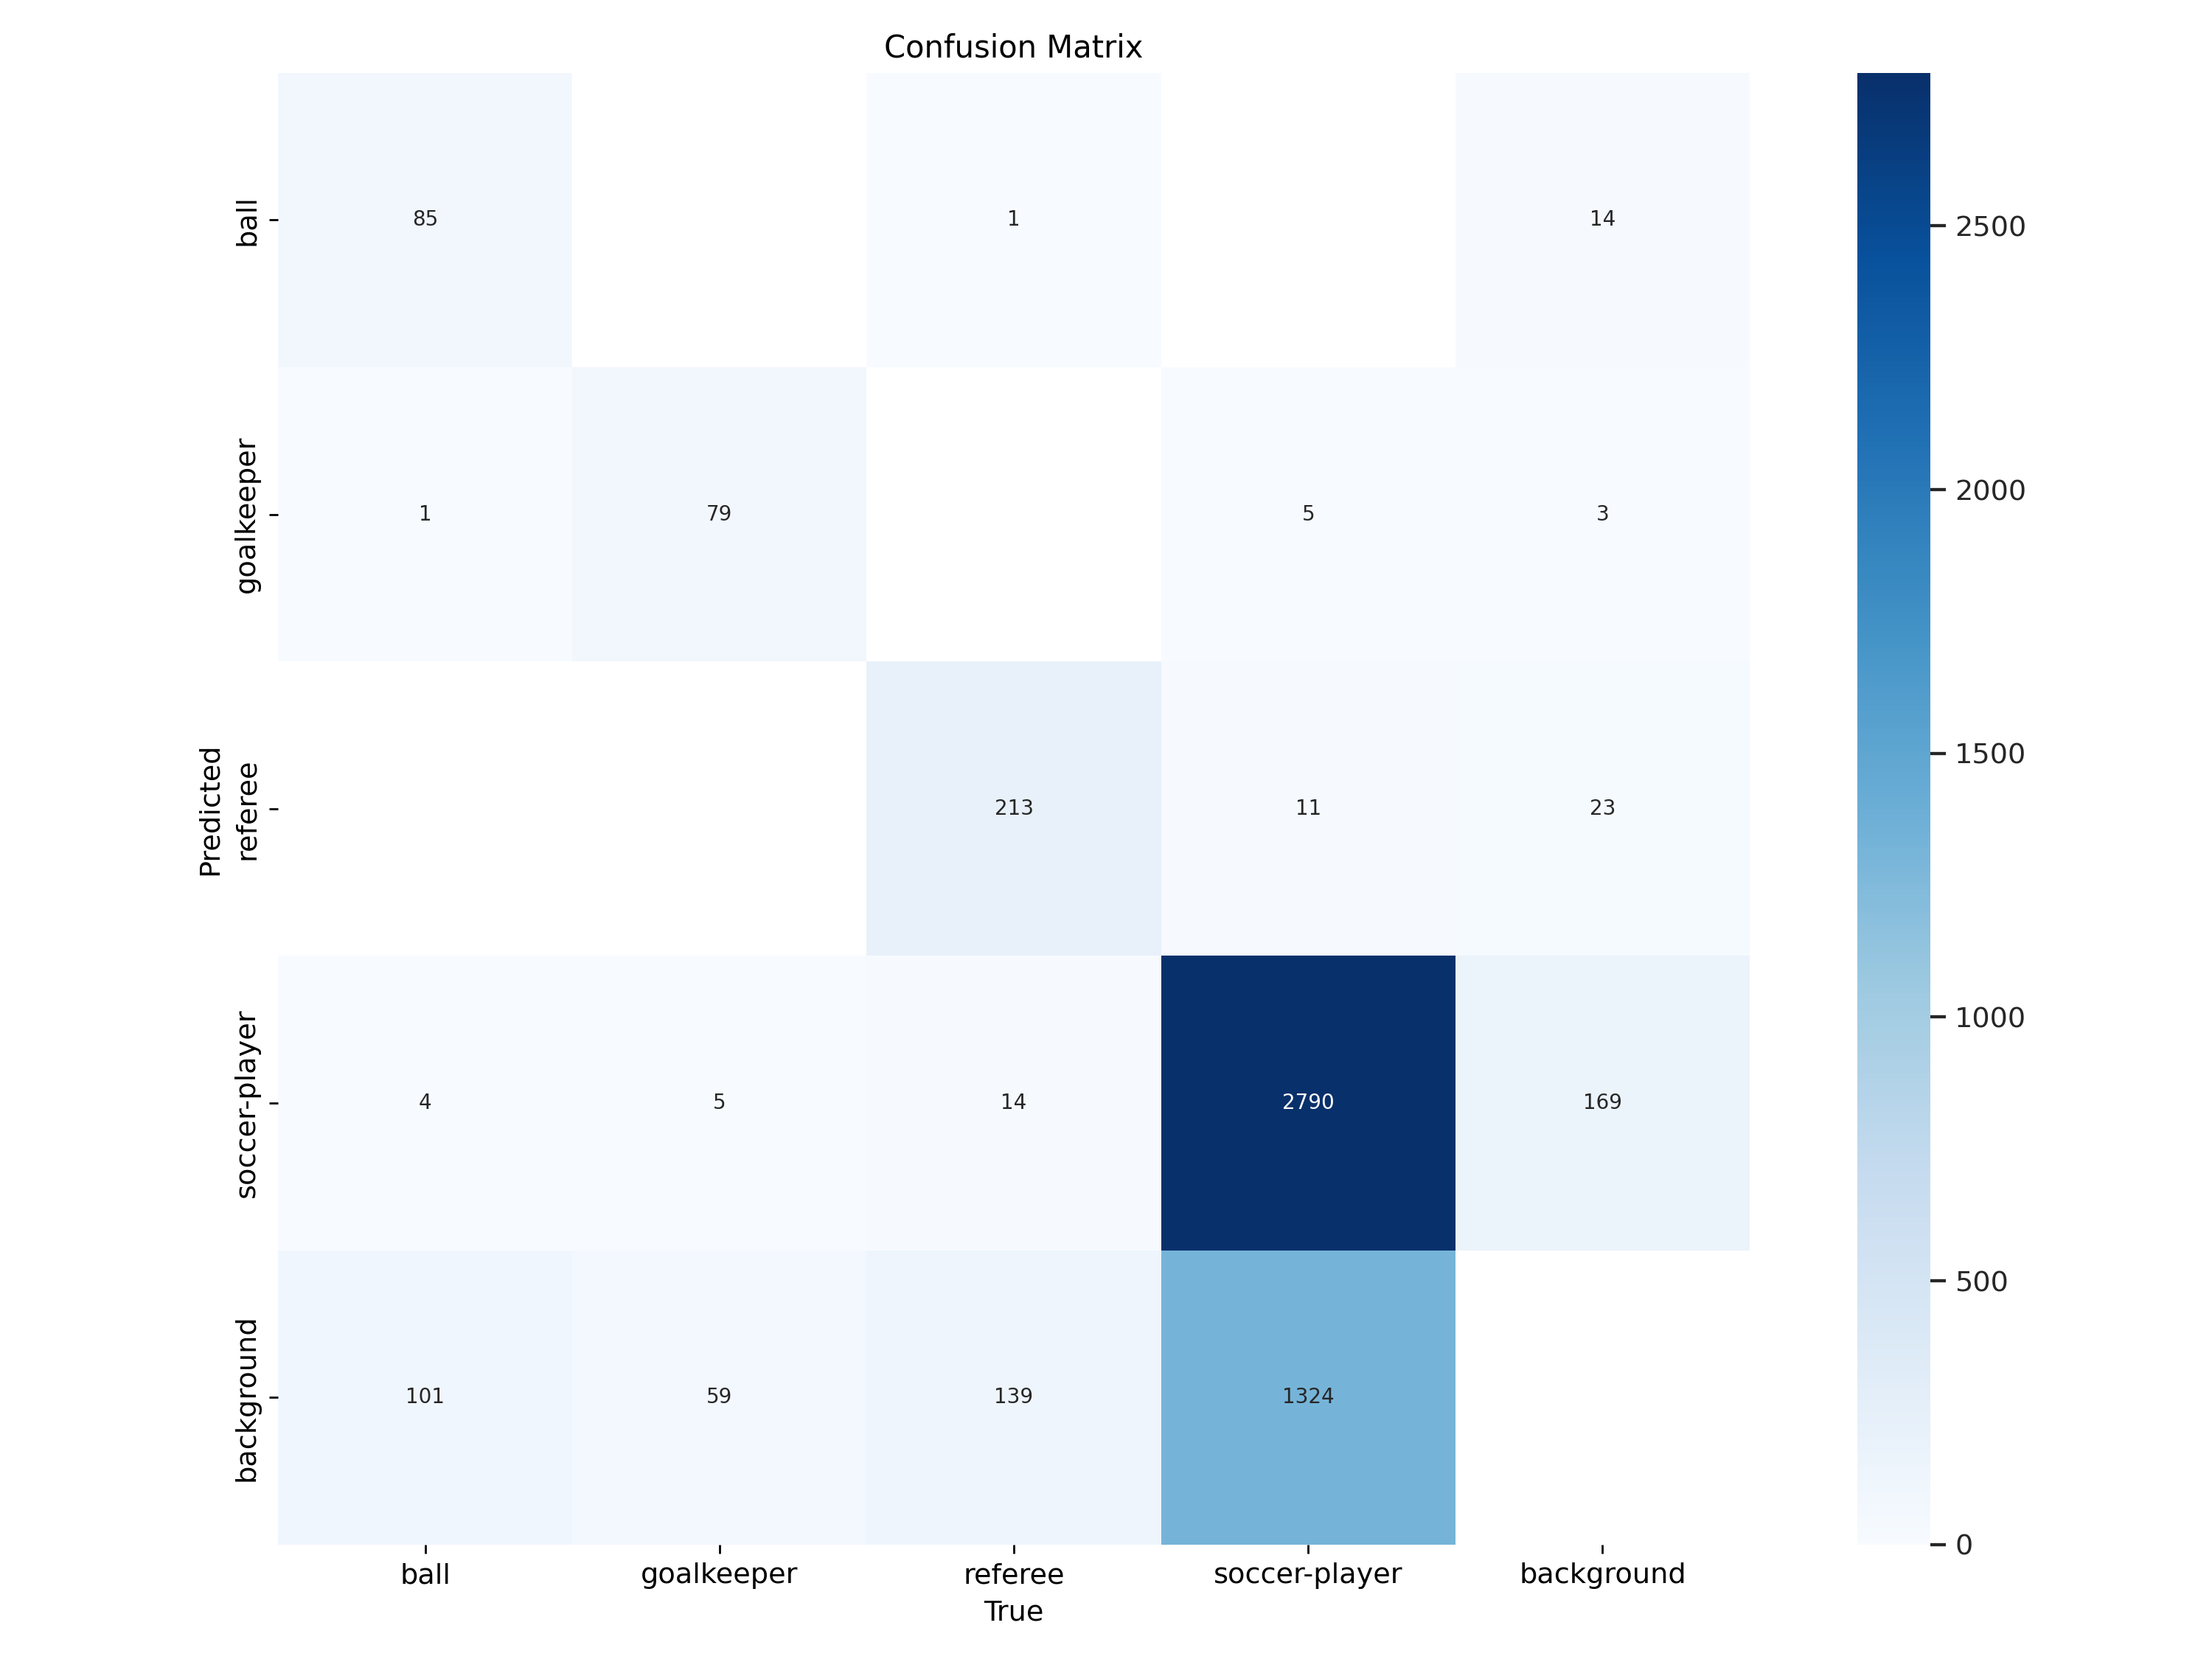

In [ ]:
# Navigate back to the home directory
%cd {HOME}

# Display the confusion matrix image to evaluate model performance
# The confusion matrix provides insights into the true vs. predicted classifications
Image(filename=f'{HOME}/runs/detect/train2/confusion_matrix.png', width=600)

/content


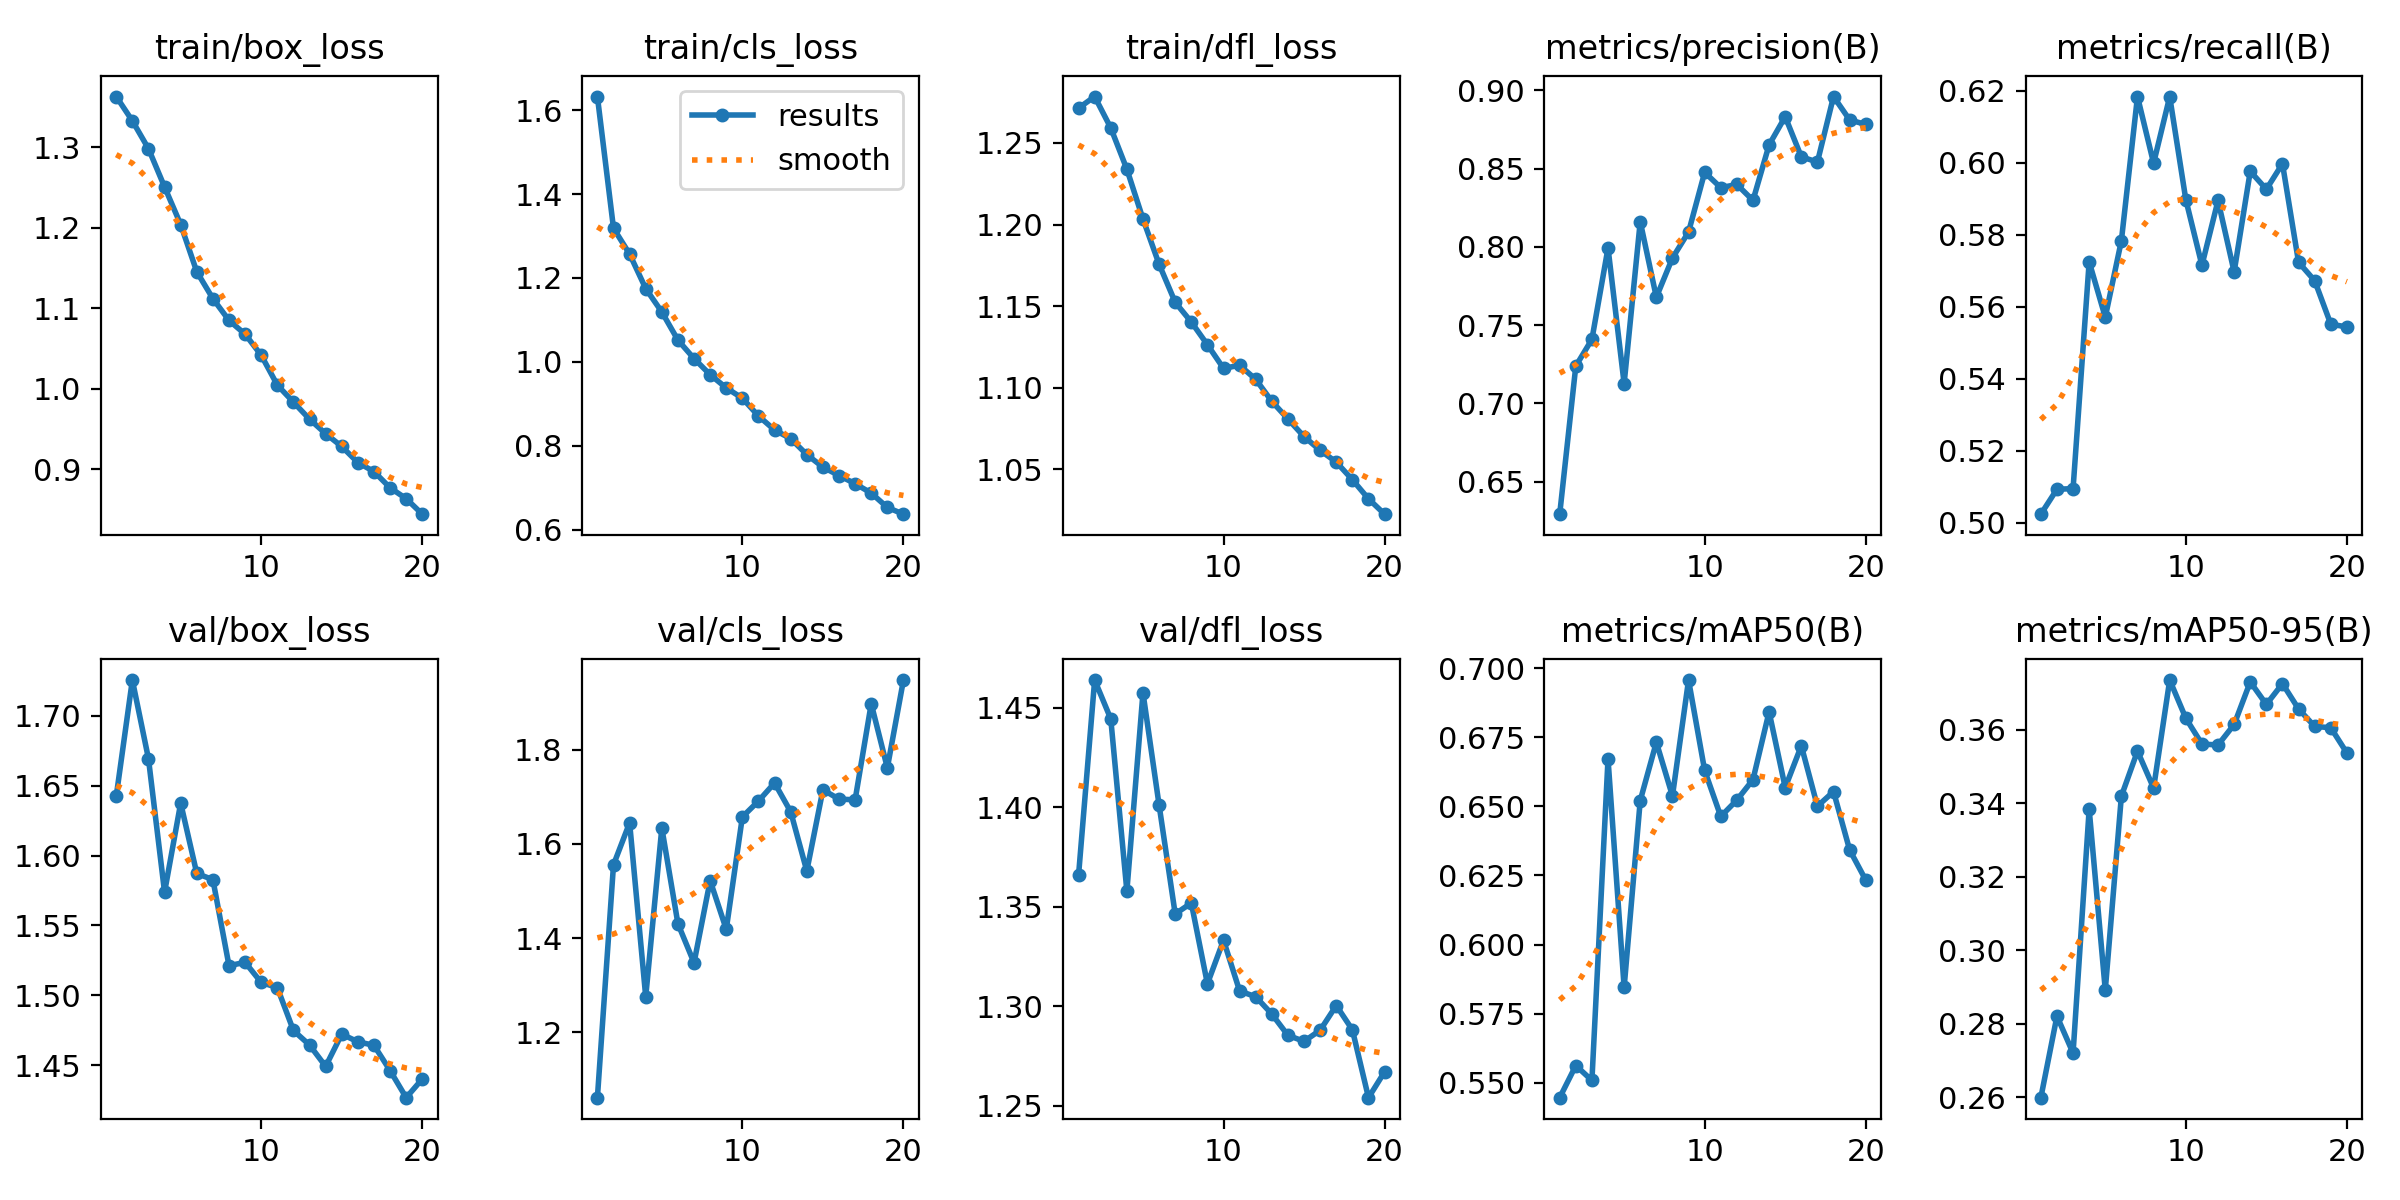

In [ ]:
# Ensure we are in the home directory
%cd {HOME}

# Display the results plot to analyze the training performance over time
# This plot includes key metrics that help in understanding the model's learning progress
Image(filename=f'{HOME}/runs/detect/train2/results.png', width=600)

/content


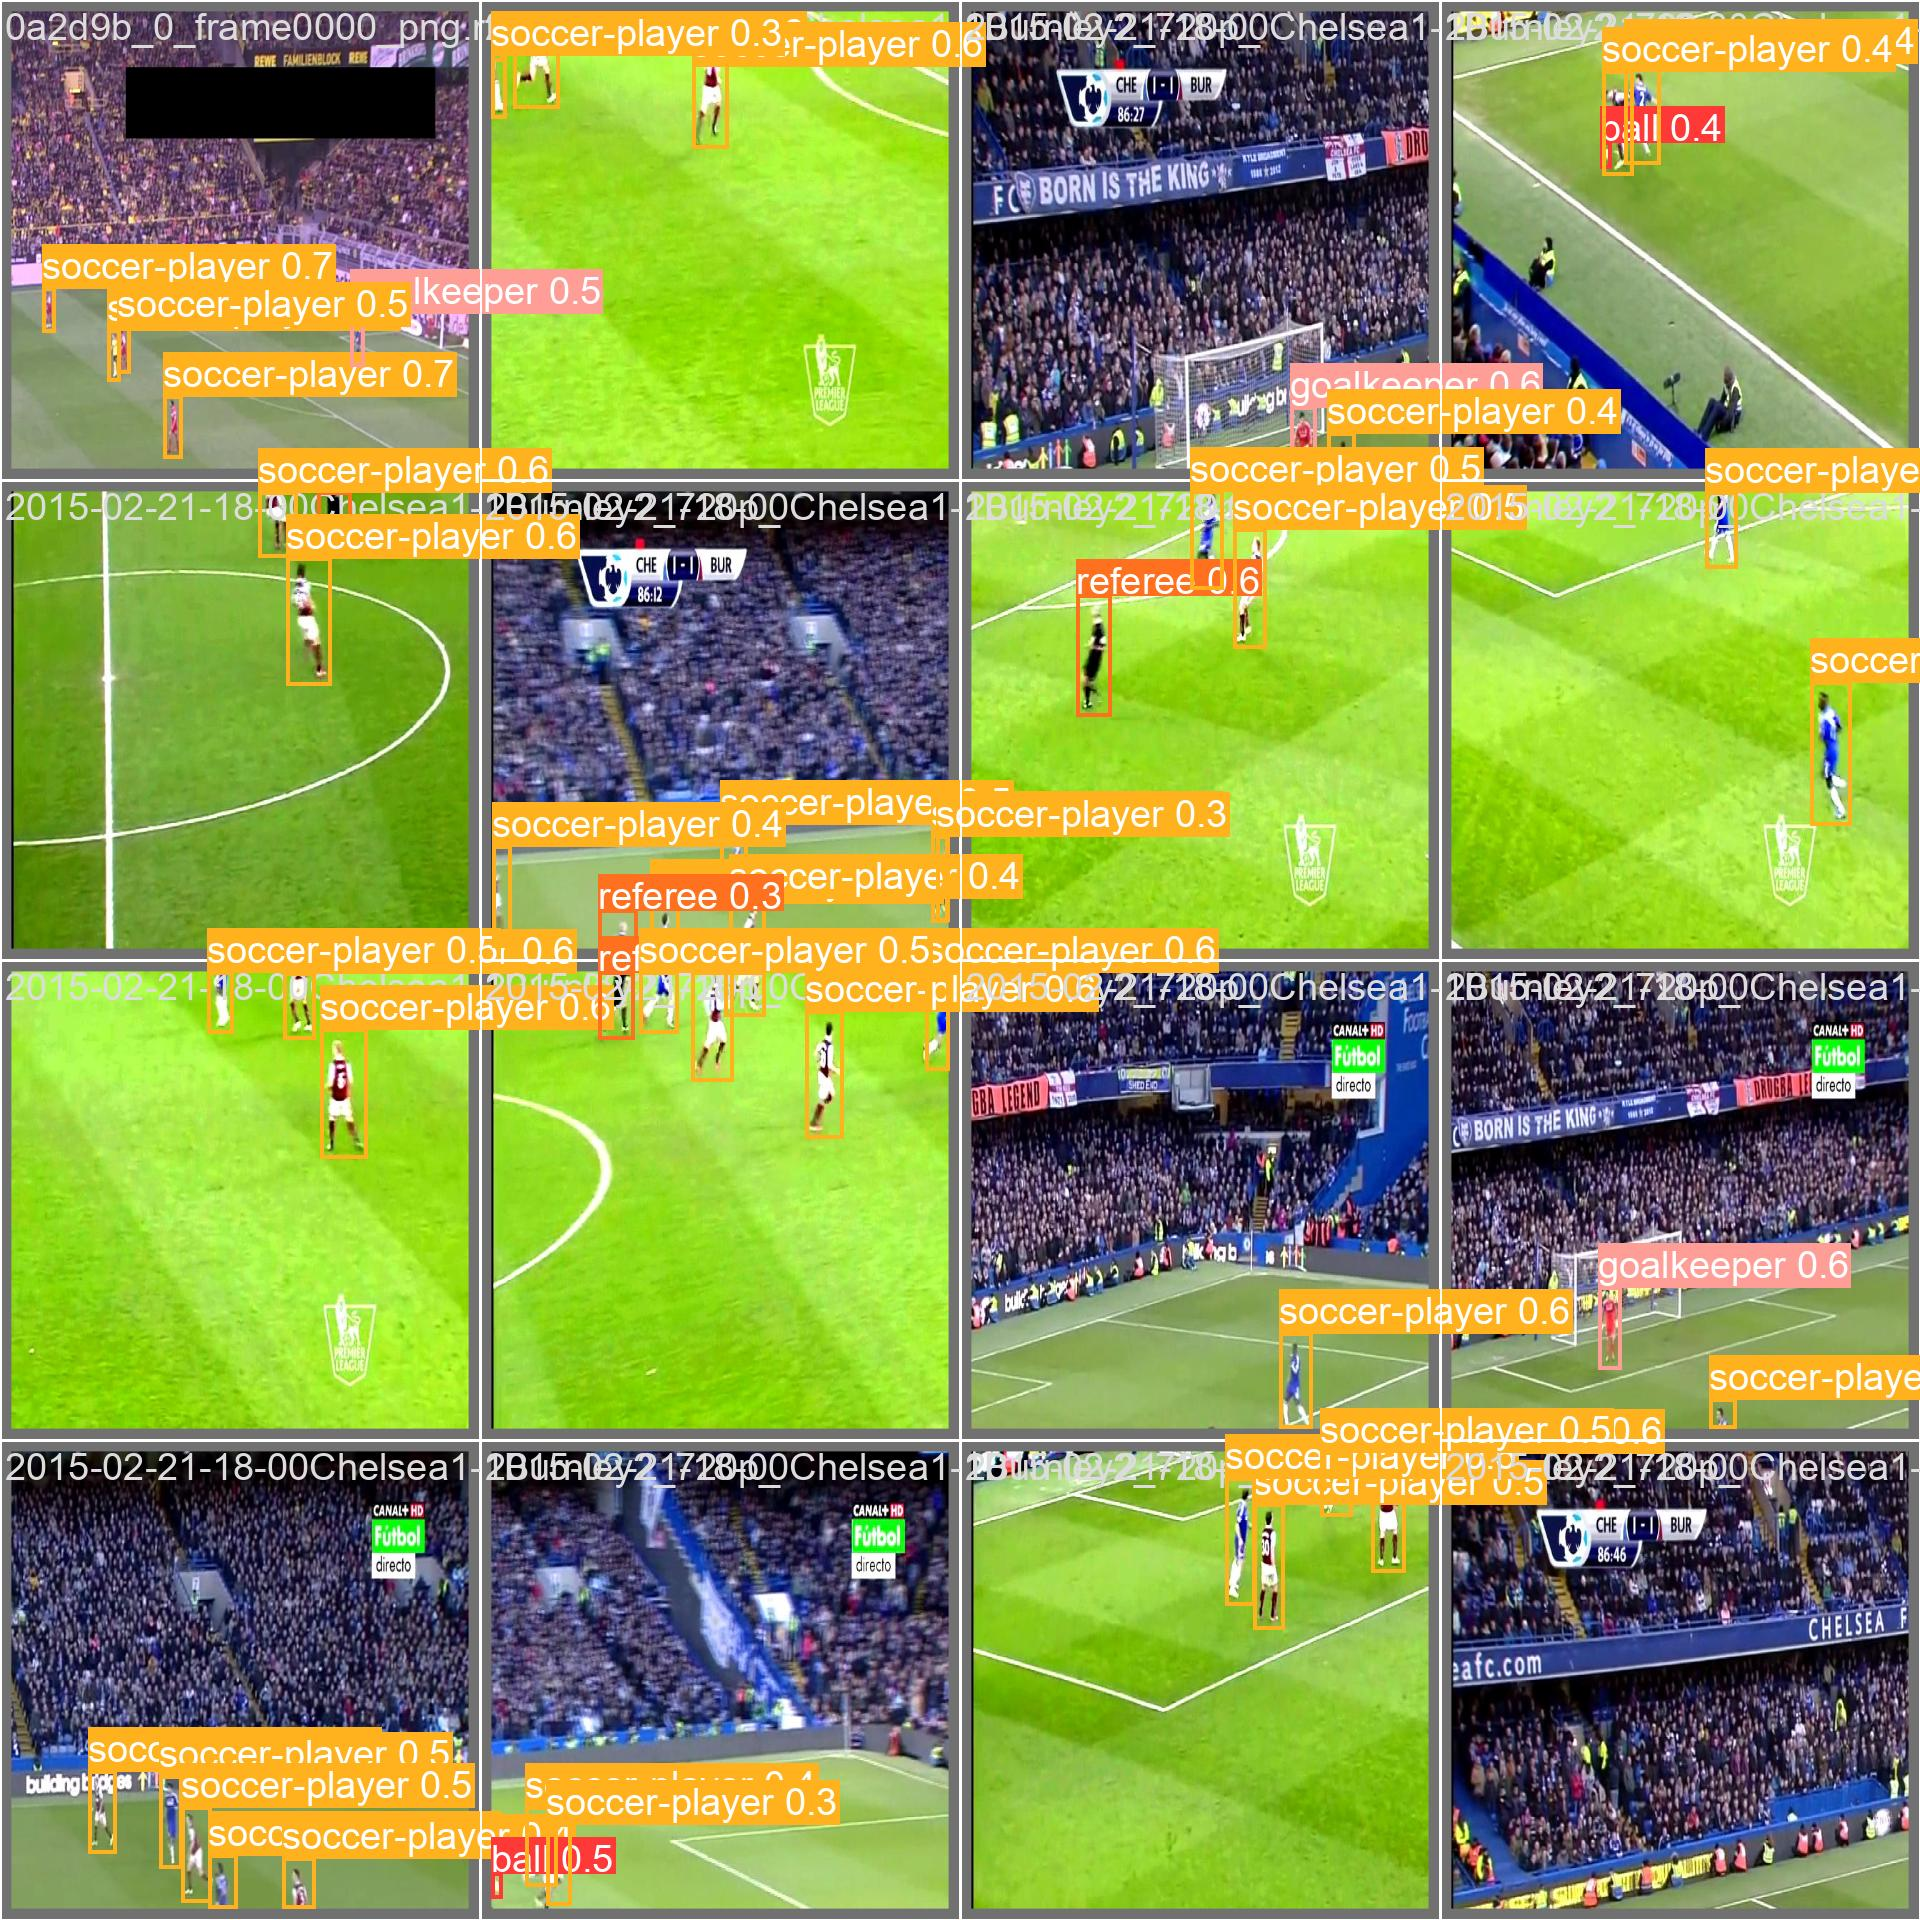

In [ ]:
# Confirm the current directory is set to HOME for consistent file access
%cd {HOME}

# Display a sample detection image to visually assess the model's detection capabilities
# This provides a quick way to verify the effectiveness of the trained model on validation data
Image(filename=f'{HOME}/runs/detect/train2/val_batch0_pred.jpg', width=600)

## Conclusion and Next Steps

This notebook demonstrated the process of training a YOLOv8 model for player detection. By reviewing the training outputs, including confusion matrices, results plots, and sample detections, we can assess the model's performance and its readiness for deployment in practical applications.

### Next Steps
- Further tuning of the model parameters to improve accuracy.
- Expanding the dataset for better generalization.
- Implementing the model in a real-time detection system for sports analytics.

The successful training and evaluation indicate the model's potential for deployment in various use cases, providing a foundation for further development and refinement.